First, change directory to "/scraping/scrapeStats".
Do : "scrapy crawl proBStats -O dataset_proBstats.json"
Do : "scrapy crawl playersInformation -O dataset_proBPlayers.json"
Do : "python script_clean_duplicate_players.py"

Now we have all informations on Pro B players.
Transform these in a global dataset.

In [49]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_json('dist/dataset_proBstats.json')
df2 = pd.read_json('dist/dataset_proBPlayers.json')

merged_df = pd.merge(df1, df2, on='playerId')

merged_df.to_json('dist/full_dataset.json', orient='records')

In [50]:
df_final = pd.read_json('dist/full_dataset.json')
df_final.head()

,playerPicture,playerName,playerId,teamPicture,teamName,gamesPlayed,gamesWhereStarted,totalMinutes,totalPoints,totalFieldGoalAttempted,...,totalBlockSudden,totalSteal,totalTurnovers,totalFoulsMade,totalFoulsSudden,+/-,totalEvaluation,playerAge,height (cm),playerRole
0,https://assets.altrstat.xyz/images/Basketball/...,Sofiane Briki,1046,https://assets.altrstat.xyz/images/Basketball/...,Gries-Souffel,20,17,499,164,40,...,3,17,47,49,35,-76,146,23,193,Meneur/Arrière
1,https://assets.altrstat.xyz/images/Basketball/...,Charles-Henri Bronchard,1060,https://assets.altrstat.xyz/images/Basketball/...,Vichy-Clermont,20,0,318,108,54,...,10,4,14,23,33,3,100,40,200,Ailier fort
2,https://assets.altrstat.xyz/images/Basketball/...,Léopold Ca,1200,https://assets.altrstat.xyz/images/Basketball/...,Gries-Souffel,20,9,350,100,51,...,2,13,21,45,15,25,167,24,208,Ailier fort
3,https://assets.altrstat.xyz/images/Basketball/...,Ousmane Camara,1239,https://assets.altrstat.xyz/images/Basketball/...,Evreux,20,16,385,93,79,...,4,9,30,48,21,-58,160,33,205,Intérieur
4,https://assets.altrstat.xyz/images/Basketball/...,Corentin Carne,1284,https://assets.altrstat.xyz/images/Basketball/...,Aix-Maurienne,16,4,302,54,20,...,1,10,17,32,18,-50,43,26,195,Arrière


# EDA

### Select only players who have played. Put all stats at the same 30 minutes report.

In [51]:
df_final = df_final[df_final.gamesPlayed > 0]

df_final["minutes_per_match"] = df_final["totalMinutes"] / df_final["gamesPlayed"]

df_final["points_per_30min"] = df_final["totalPoints"] / df_final["totalMinutes"] * 30
df_final.drop("totalPoints", axis = 1, inplace=True)

df_final["fieldGoalAttempted_per_30min"] = df_final["totalFieldGoalAttempted"] / df_final["totalMinutes"] * 30
df_final.drop("totalFieldGoalAttempted", axis = 1, inplace=True)

df_final["fieldGoalAttempted_per_30min"] = df_final["totalFieldGoal"] / df_final["totalMinutes"] * 30
df_final.drop("totalFieldGoal", axis = 1, inplace=True)

df_final["threePointAttempted_per_30min"] = df_final["totalThreePointAttempted"] / df_final["totalMinutes"] * 30
df_final.drop("totalThreePointAttempted", axis = 1, inplace=True)

df_final["threePoint_per_30min"] = df_final["totalThreePoint"] / df_final["totalMinutes"] * 30
df_final.drop("totalThreePoint", axis = 1, inplace=True)

df_final["freeThrowsAttempted_per_30min"] = df_final["totalFreeThrowsAttempted"] / df_final["totalMinutes"] * 30
df_final.drop("totalFreeThrowsAttempted", axis = 1, inplace=True)

df_final["freeThrows_per_30min"] = df_final["totalFreeThrows"] / df_final["totalMinutes"] * 30
df_final.drop("totalFreeThrows", axis = 1, inplace=True)

df_final["offensiveRebounds_per_30min"] = df_final["totalOffensiveRebounds"] / df_final["totalMinutes"] * 30
df_final.drop("totalOffensiveRebounds", axis = 1, inplace=True)

df_final["defensiveRebounds_per_30min"] = df_final["totalDefensiveRebounds"] / df_final["totalMinutes"] * 30
df_final.drop("totalDefensiveRebounds", axis = 1, inplace=True)

df_final["rebounds_per_30min"] = df_final["offensiveRebounds_per_30min"] + df_final["defensiveRebounds_per_30min"]
df_final.drop("totalRebounds", axis = 1, inplace=True)

df_final["assists_per_30min"] = df_final["totalAssists"] / df_final["totalMinutes"] * 30
df_final.drop("totalAssists", axis = 1, inplace=True)

df_final["blockMade_per_30min"] = df_final["totalBlockMade"] / df_final["totalMinutes"] * 30
df_final.drop("totalBlockMade", axis = 1, inplace=True)

df_final["blockSudden_per_30min"] = df_final["totalBlockSudden"] / df_final["totalMinutes"] * 30
df_final.drop("totalBlockSudden", axis = 1, inplace=True)

df_final["steal_per_30min"] = df_final["totalSteal"] / df_final["totalMinutes"] * 30
df_final.drop("totalSteal", axis = 1, inplace=True)

df_final["turnovers_per_30min"] = df_final["totalTurnovers"] / df_final["totalMinutes"] * 30
df_final.drop("totalTurnovers", axis = 1, inplace=True)

df_final["foulsMade_per_30min"] = df_final["totalFoulsMade"] / df_final["totalMinutes"] * 30
df_final.drop("totalFoulsMade", axis = 1, inplace=True)

df_final["foulsSudden_per_30min"] = df_final["totalFoulsSudden"] / df_final["totalMinutes"] * 30
df_final.drop("totalFoulsSudden", axis = 1, inplace=True)

df_final["+/-_per_30min"] = df_final["+/-"] / df_final["totalMinutes"] * 30
df_final.drop("+/-", axis = 1, inplace=True)

df_final["evaluation_per_30min"] = df_final["totalEvaluation"] / df_final["totalMinutes"] * 30
df_final.drop("totalEvaluation", axis = 1, inplace=True)

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 195
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   playerPicture                  166 non-null    object 
 1   playerName                     167 non-null    object 
 2   playerId                       167 non-null    int64  
 3   teamPicture                    167 non-null    object 
 4   teamName                       167 non-null    object 
 5   gamesPlayed                    167 non-null    int64  
 6   gamesWhereStarted              167 non-null    int64  
 7   totalMinutes                   167 non-null    int64  
 8   totalFieldGoalPercentage       167 non-null    float64
 9   totalThreePointPercentage      167 non-null    float64
 10  totalFreeThrowsPercentage      167 non-null    float64
 11  playerAge                      167 non-null    int64  
 12  height (cm)                    167 non-null    int

In [53]:
df_final.describe()

,playerId,gamesPlayed,gamesWhereStarted,totalMinutes,totalFieldGoalPercentage,totalThreePointPercentage,totalFreeThrowsPercentage,playerAge,height (cm),minutes_per_match,...,rebounds_per_30min,assists_per_30min,blockMade_per_30min,blockSudden_per_30min,steal_per_30min,turnovers_per_30min,foulsMade_per_30min,foulsSudden_per_30min,+/-_per_30min,evaluation_per_30min
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,5087.089820,18.467066,10.089820,402.904192,52.730539,28.956287,72.786826,27.413174,196.598802,21.669310,...,4.857154,2.603850,0.346151,0.298751,1.024097,2.025872,3.243181,3.012973,-0.198615,12.775978
std,2872.151072,2.451418,7.353244,123.062734,9.186204,12.839146,12.352725,4.898052,8.546161,5.723426,...,2.258408,1.630531,0.463332,0.204916,0.450050,0.556536,1.000773,1.146181,4.457184,3.708486
min,23.000000,10.000000,0.000000,43.000000,29.200000,0.000000,23.300000,18.000000,173.000000,3.909091,...,0.894040,0.300000,0.000000,0.000000,0.000000,0.849057,1.277778,0.357143,-13.880597,4.054054
25%,2468.500000,18.000000,2.000000,330.000000,47.650000,25.500000,66.700000,24.000000,191.000000,18.469925,...,3.000080,1.496269,0.068650,0.145975,0.708313,1.639085,2.495487,2.211998,-3.435709,10.219051
50%,5436.000000,20.000000,10.000000,411.000000,52.500000,31.600000,74.400000,27.000000,198.000000,21.900000,...,4.591029,2.101911,0.197802,0.254237,0.974729,2.066327,3.115124,2.920354,0.240964,12.613065
75%,7820.000000,20.000000,17.000000,490.500000,57.400000,37.600000,80.500000,31.000000,203.000000,25.640789,...,6.367283,3.425297,0.421583,0.433219,1.269072,2.331853,3.936456,3.626663,2.814121,14.978956
max,9265.000000,20.000000,20.000000,657.000000,100.000000,50.000000,100.000000,40.000000,220.000000,32.850000,...,11.150442,9.322709,3.085714,0.943396,2.595420,3.400810,6.400000,6.621392,10.026738,25.846154


### Correlation plot

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_16771/1906538086.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  C_mat = df_final.corr()


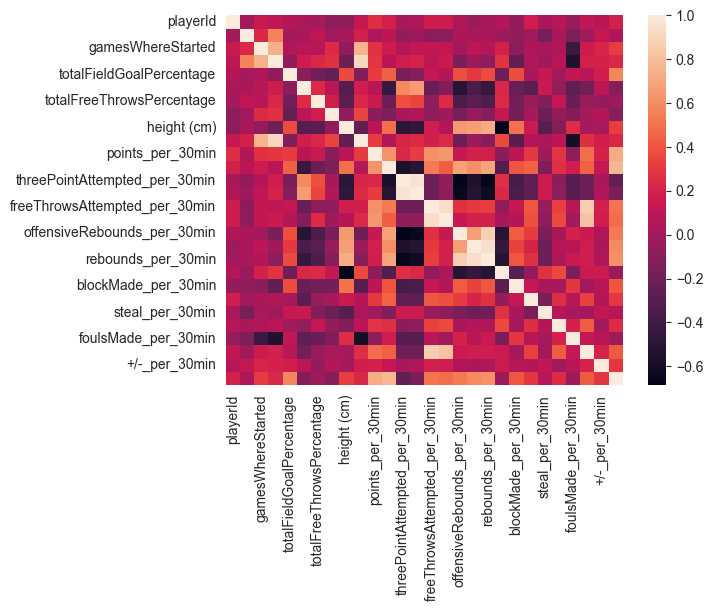

In [54]:
C_mat = df_final.corr()
sns.heatmap(C_mat);

### Dependence on Skewness

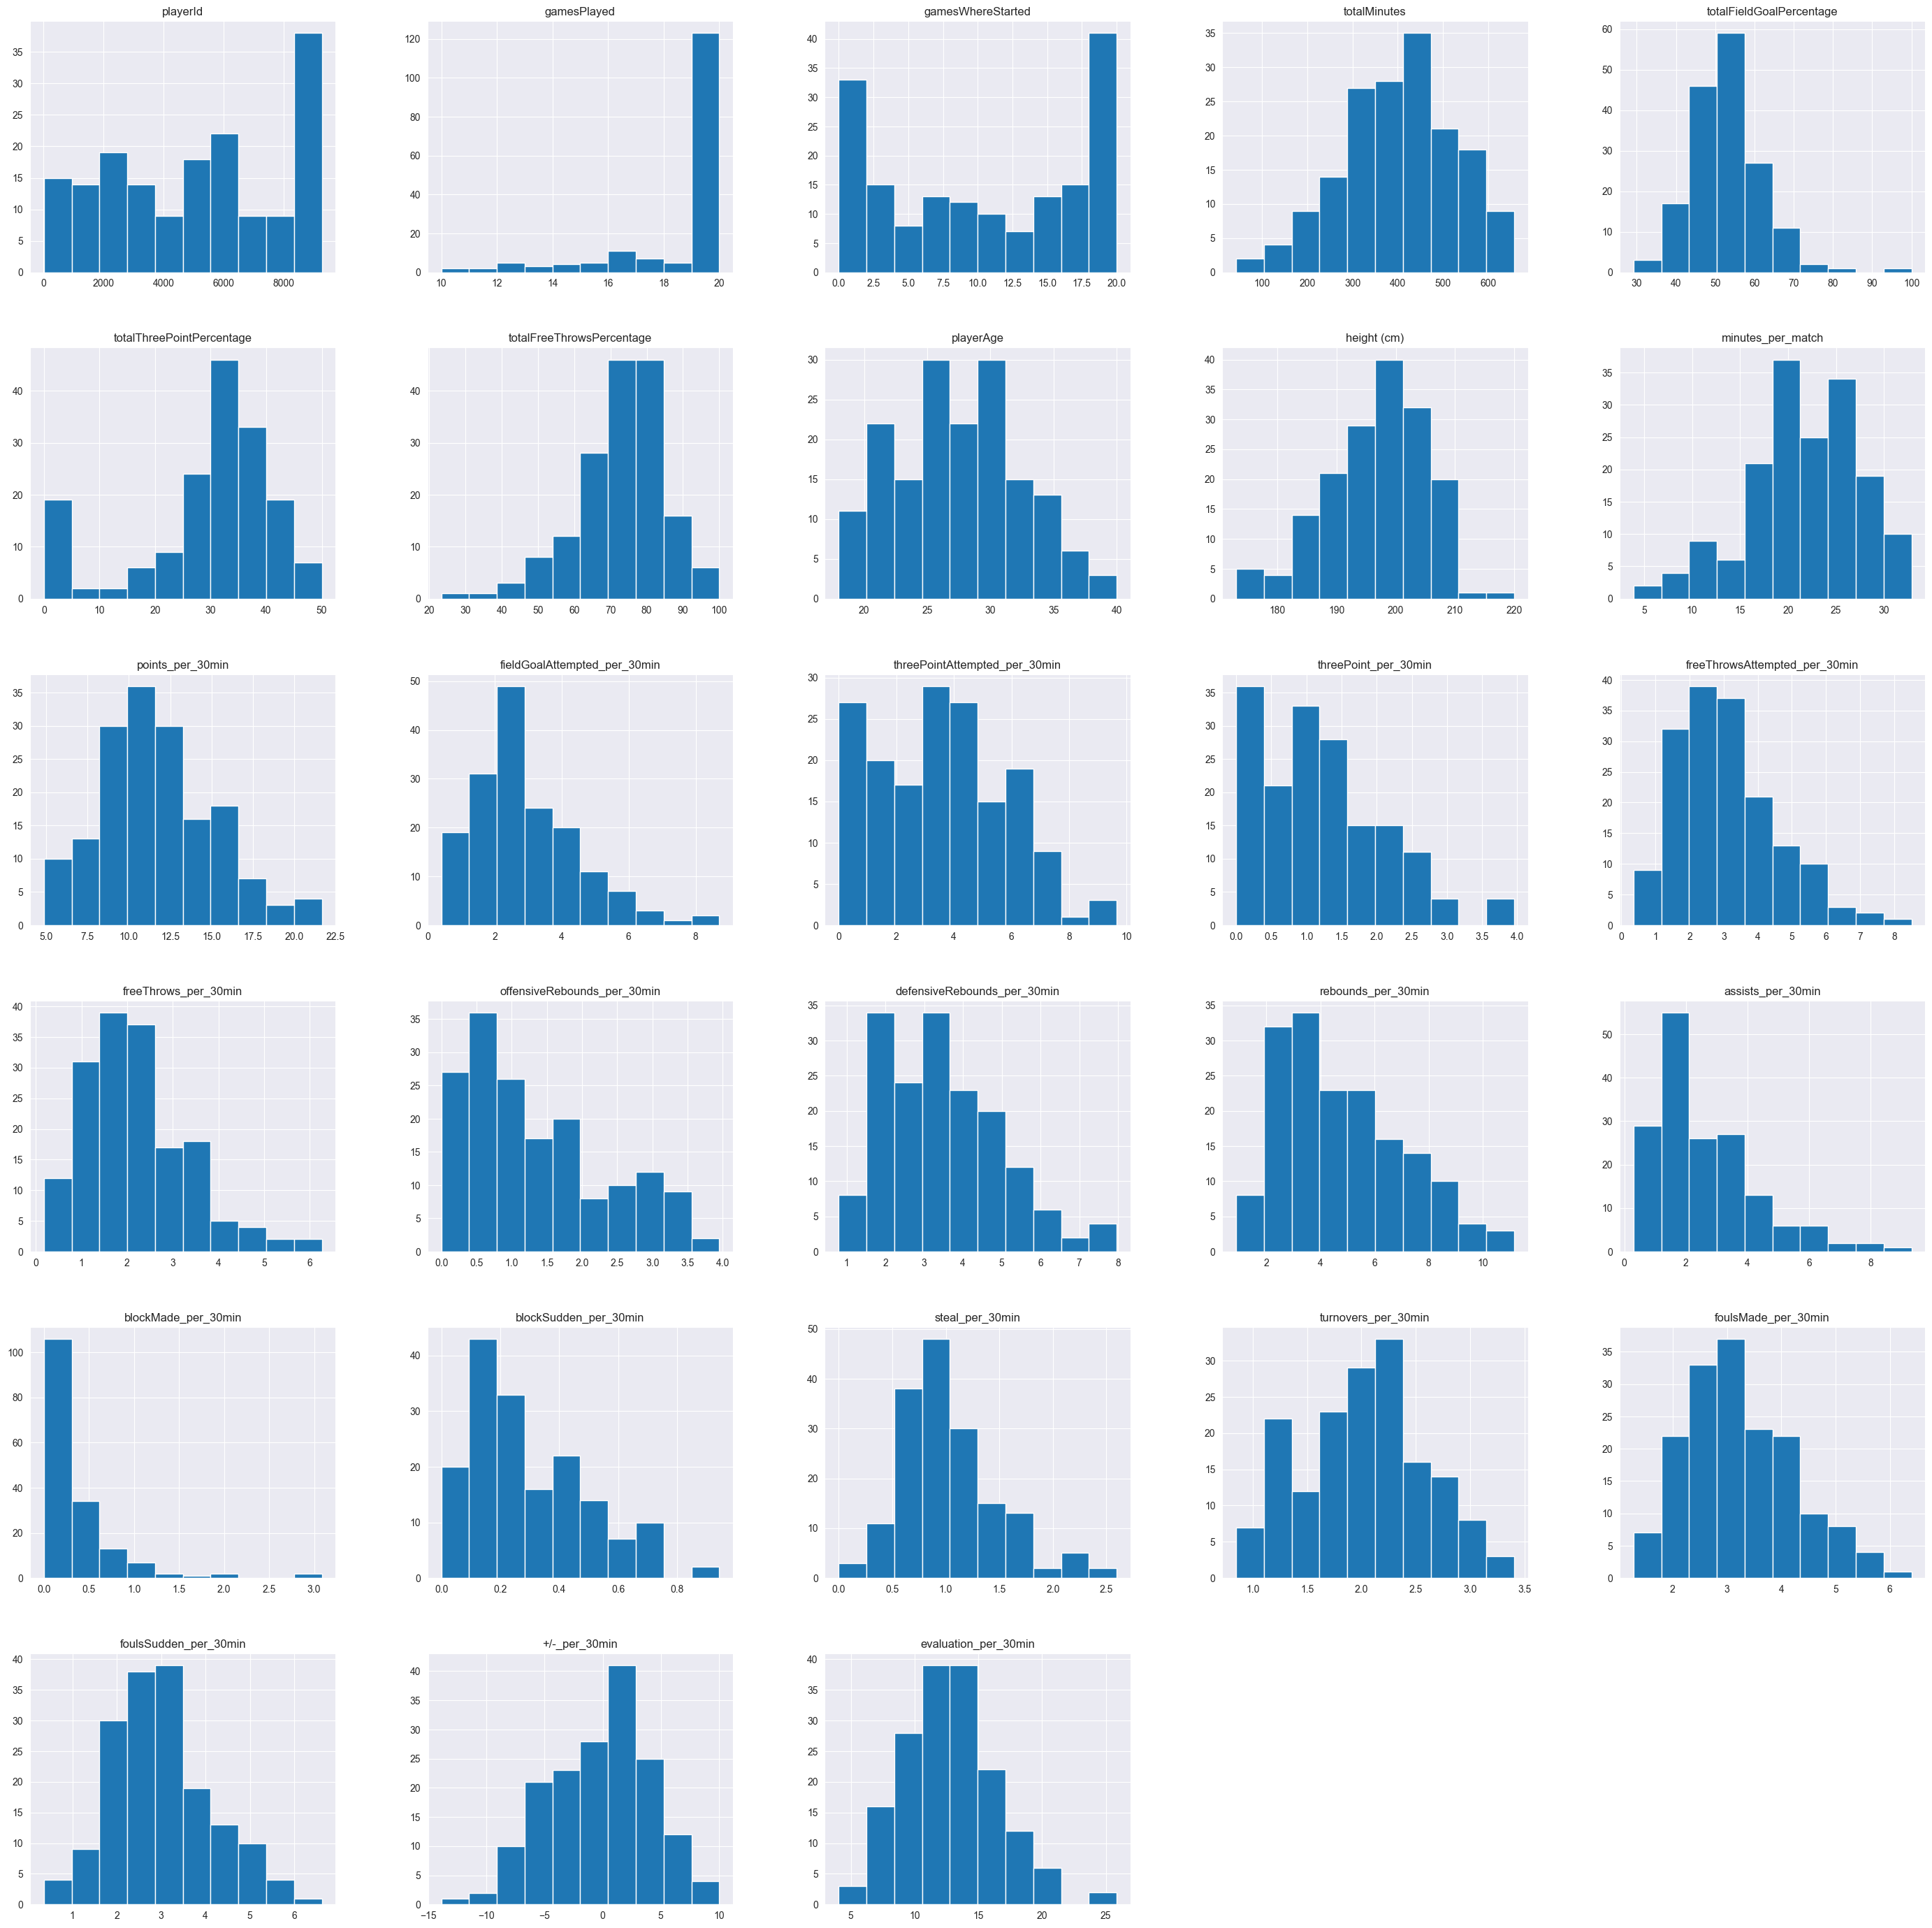

In [55]:
df_final.hist(figsize = (35,35))
plt.show()

We can replace the actual skewed distributed features with a new created normally distributed feature in our dataset using logarithmic function.

### Pair-plot based on points

In [ ]:
sns.pairplot(df_final, hue="points_per_30min")

### Categorical Feature

Text(0, 0.5, 'Count')

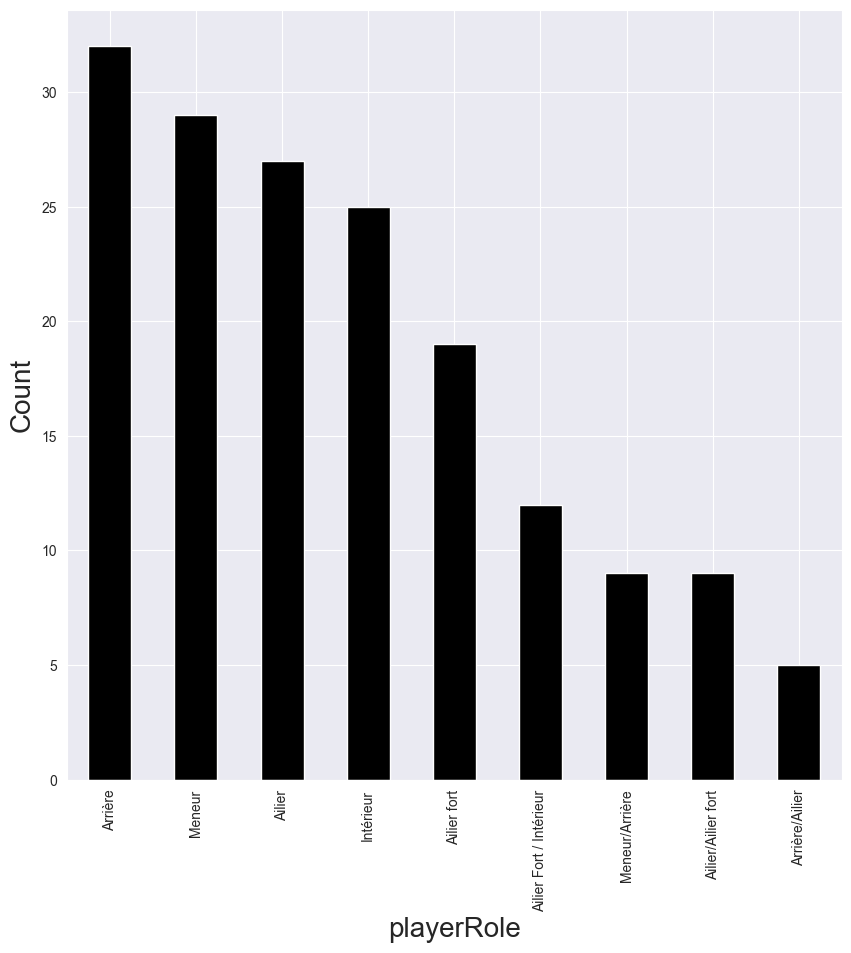

In [63]:
feature = "playerRole"
ax = df_final[feature].value_counts().plot(kind='bar',
                                    figsize=(10,10),
                                    color='black')
ax.set_xlabel(feature, fontsize=20)
ax.set_ylabel("Count",fontsize=20)

#### Points based on Player Role

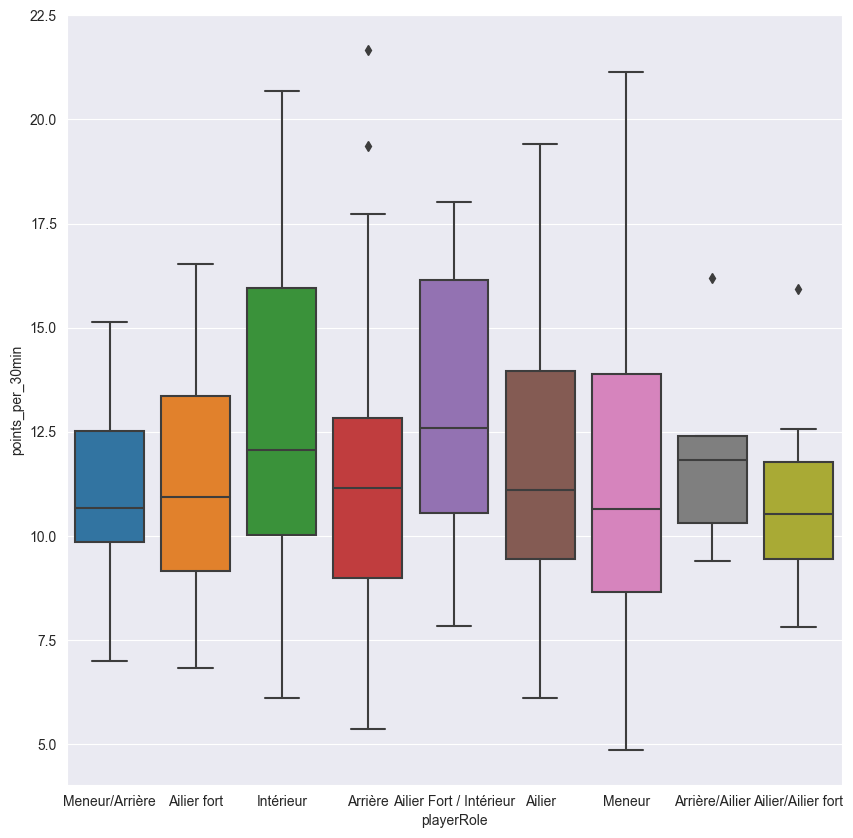

In [64]:
data = pd.concat([df_final['points_per_30min'], df_final['playerRole']], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='playerRole', y="points_per_30min", data=data)

# PCA

### Radar Graph to compare players

In [65]:
from numpy import pi


prct_var = ['totalFieldGoalPercentage', 'totalThreePointPercentage', 'totalFreeThrowsPercentage']
other_var = ['rebounds_per_30min', 'assists_per_30min', 'steal_per_30min', 'foulsMade_per_30min', 'blockMade_per_30min']
def agg_on_columns(df, agg_var, operation=['mean']):
    return df[agg_var].agg(operation)
def radar_plot(ax, df, max_val=1):
    categories=list(df)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    yticks = [max_val*i/4 for i in range(1,4)]
    plt.yticks(yticks, [str(e) for e in yticks], color="grey", size=10)
    plt.ylim(0,max_val)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    colors = ['b','r','g']
    for i in range(len(df)):
        values = df.values[i].flatten().tolist()
        values += values[:1]
        color = colors[i]

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid', color=color, label=df.index[i])

        # Fill area
        ax.fill(angles, values, color, alpha=0.1)

    # Add legend
    plt.legend(loc=0, bbox_to_anchor=(0.1, 0.1), prop={'size': 13})
def get_players_stats(player_one, player_two):
    player_one_df = df_final[df_final['playerName'] == player_one]
    player_two_df = df_final[df_final['playerName'] == player_two]

    player_one_agg_prct = agg_on_columns(df=player_one_df, agg_var=prct_var, operation=['mean'])
    player_one_agg_other = agg_on_columns(df=player_one_df, agg_var=other_var, operation=['mean'])

    player_two_agg_prct = agg_on_columns(df=player_two_df, agg_var=prct_var, operation=['mean'])
    player_two_agg_other = agg_on_columns(df=player_two_df, agg_var=other_var, operation=['mean'])

    stats_prct = pd.concat([player_one_agg_prct, player_two_agg_prct])
    stats_other = pd.concat([player_one_agg_other, player_two_agg_other])

    stats_prct.index = [player_one, player_two]
    stats_other.index = [player_one, player_two]

    return stats_prct, stats_other
def show_player_stats_comparison(stats_prct, stats_other):
    fig, ax = plt.subplots(figsize=(18, 9))

    ax = plt.subplot(121, polar=True)
    ax.set_title('Percentage statistics')
    radar_plot(ax=ax, df=stats_prct, max_val=100)

    ax = plt.subplot(122, polar=True)
    ax.set_title('Others statistics')
    radar_plot(ax=ax, df=stats_other, max_val=10)

    plt.show()

#### Stats comparison between Bastien Vautier and Essome Miyem

/var/folders/r8/zqmq4mj91p1f_0yg_2vxkx_80000gn/T/ipykernel_16771/3624557044.py:61: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(121, polar=True)


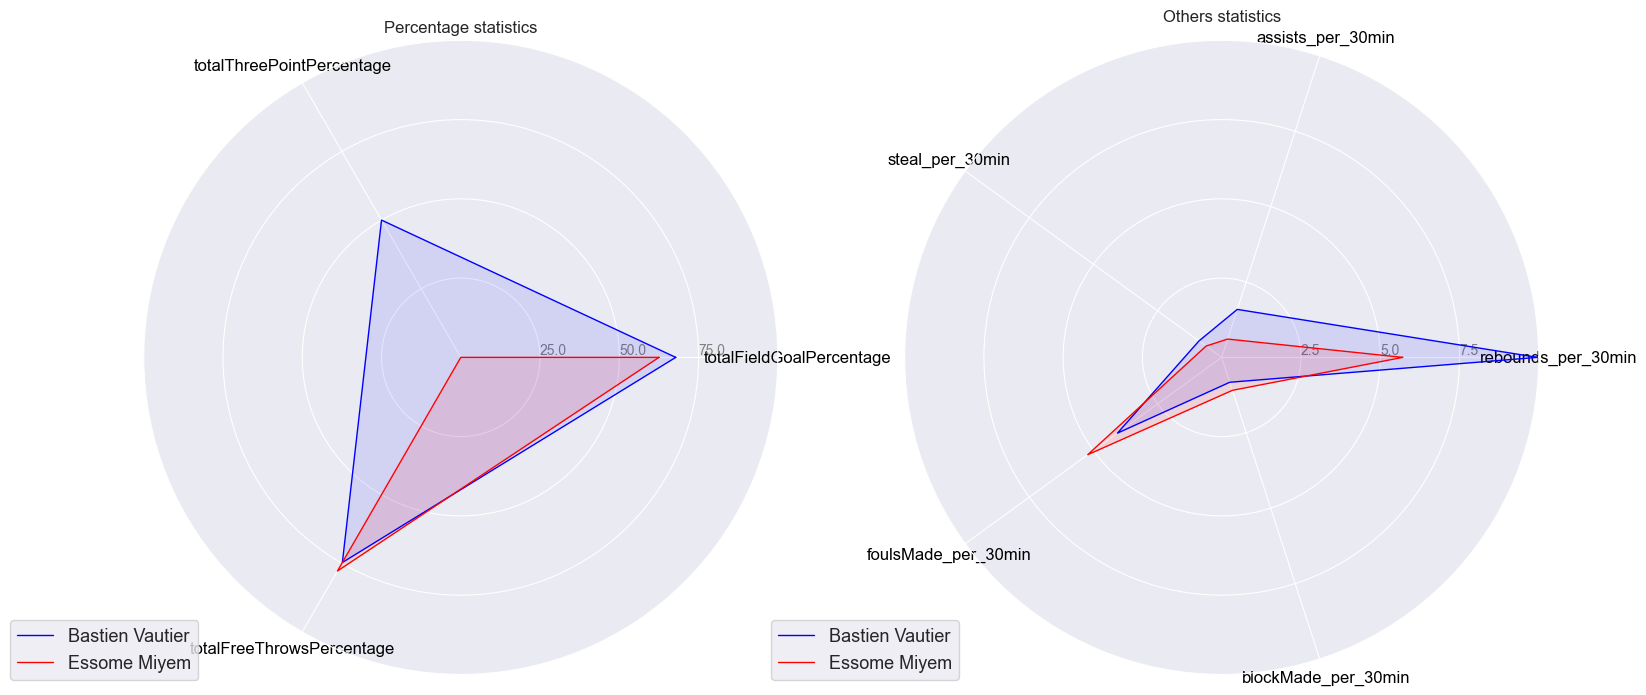

In [66]:
from IPython.core.display import Markdown

player_one = 'Bastien Vautier'
player_two = 'Essome Miyem'
stats_prct, stats_other = get_players_stats(player_one=player_one, player_two=player_two)
display(Markdown(f'#### Stats comparison between {player_one} and {player_two}'))

show_player_stats_comparison(stats_prct, stats_other)

### Top Scoreurs

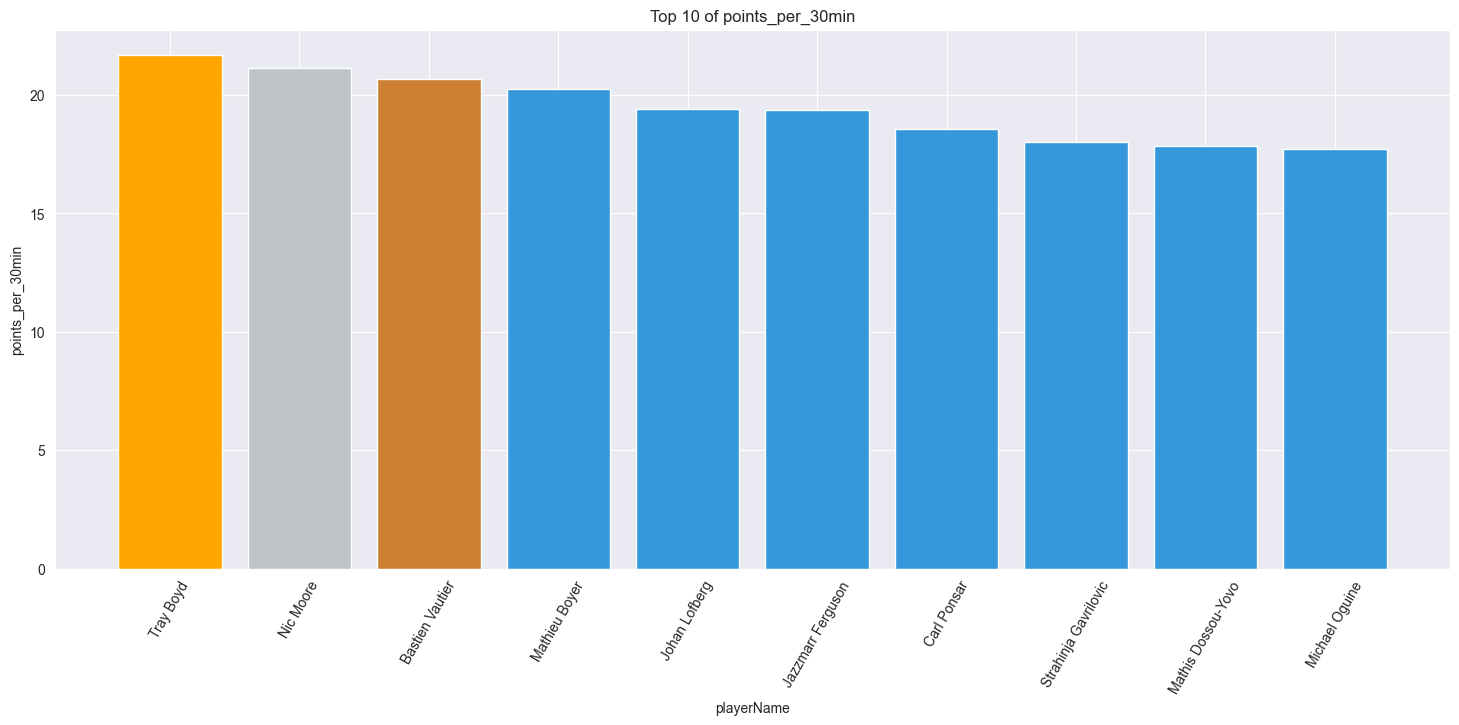

In [67]:
def plot_top(df, column, label_col=None, max_plot=5):
    top_df = df.sort_values(column, ascending=False).head(max_plot)

    height = top_df[column]
    x = top_df.index if label_col == None else top_df[label_col]

    gold, silver, bronze, other = ('#FFA400', '#bdc3c7', '#cd7f32', '#3498db')
    colors = [gold if i == 0 else silver if i == 1 else bronze if i == 2 else other for i in range(0, len(top_df))]

    fig, ax = plt.subplots(figsize=(18, 7))
    ax.bar(x, height, color=colors)
    plt.xticks(x, x, rotation=60)
    plt.xlabel(label_col)
    plt.ylabel(column)
    plt.title(f'Top {max_plot} of {column}')
    plt.show()

plot_top(df_final, column='points_per_30min', label_col='playerName', max_plot=10)